In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('mushroom data set ')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# converting the all object columns into numeric form

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

here we se column havive only zero values so will drop this column

In [5]:
df.drop('veil-type',axis=1,inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# checking the statical relation

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Plotting heat maps

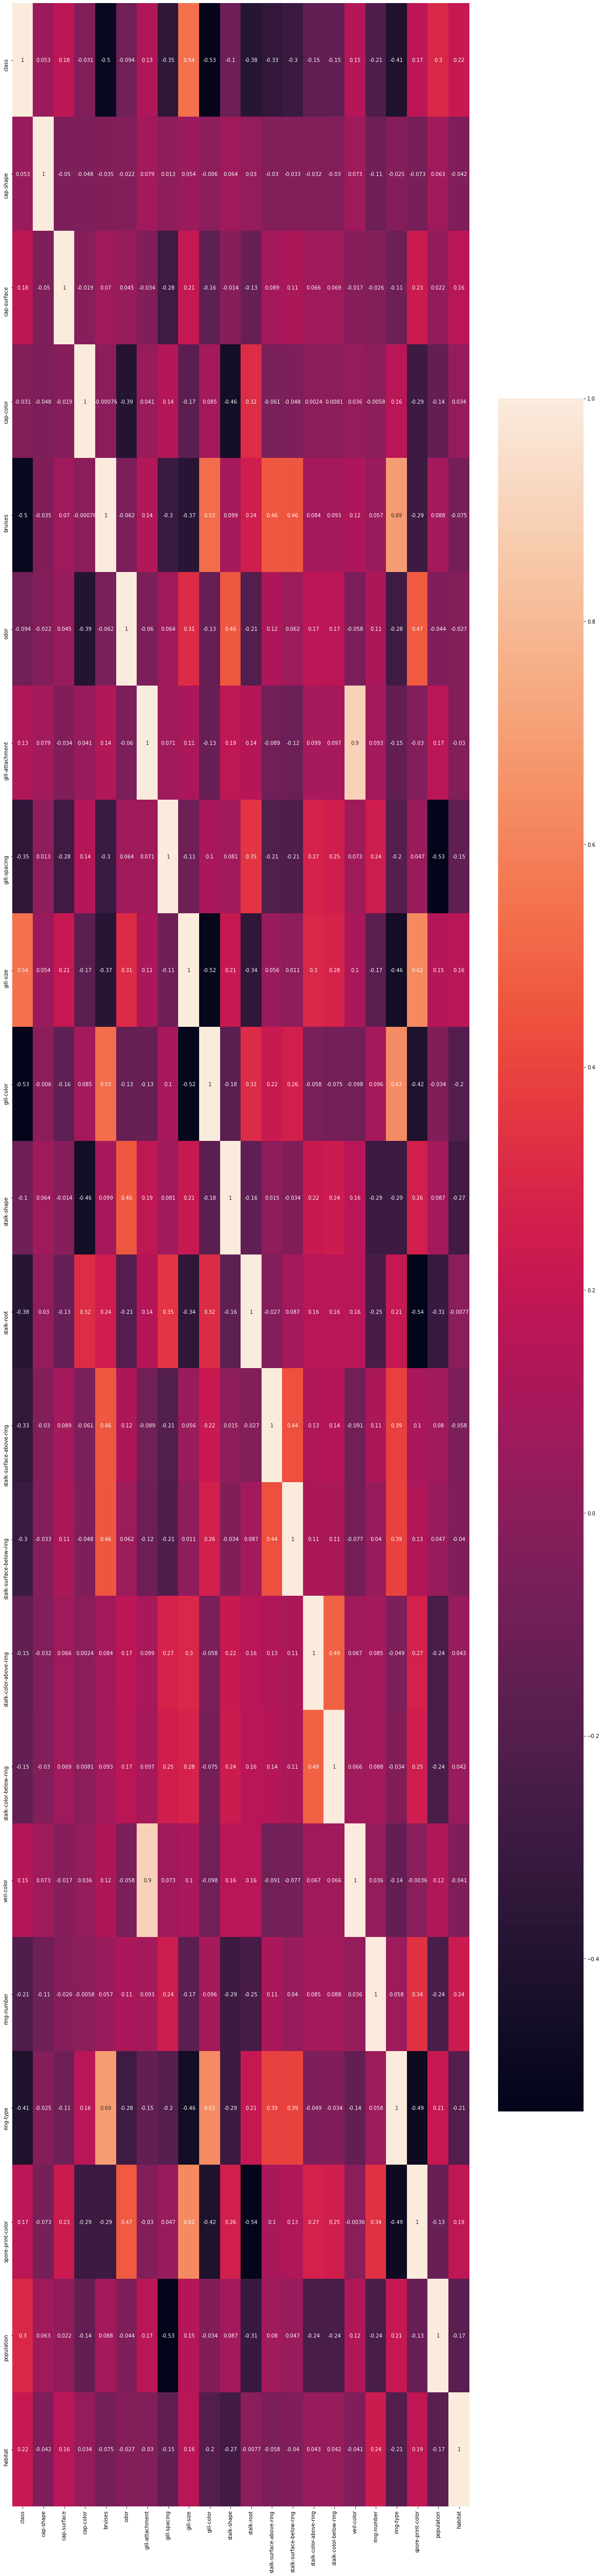

In [7]:
plt.figure(figsize=(20,90))
sns.heatmap(df.corr(),annot=True)

In [8]:
x= df.iloc[:,0:23]
x.shape

(8124, 22)

In [9]:
y=df.iloc[:,-1]
y=y.values.reshape(-1, 1)

In [10]:
y.shape

(8124, 1)

# now we have to select best random state

In [11]:
maxAccu=0
maxRS=0
for i in range (0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRs=i
print ('best Accuracy Score is :',maxAccu, 'on random_state:',maxRS)
    

best Accuracy Score is : 1.0 on random_state: 0


In [12]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[954   0   0   0   0   0   0]
 [  0 663   0   0   0   0   0]
 [  0   0 238   0   0   0   0]
 [  0   0   0  85   0   0   0]
 [  0   0   0   0 339   0   0]
 [  0   0   0   0   0  99   0]
 [  0   0   0   0   0   0  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       663
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00       339
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        60

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm  import SVC
from sklearn. tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [14]:
model=[LogisticRegression(),MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [15]:
for m in model:
    m.fit(x_train,y_train)
    pred=(m.predict(x_test))
    print('Accuracy_score of',m, 'is:')
    print(confusion_matrix(y_test,pred))
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy_score of LogisticRegression() is:
[[954   0   0   0   0   0   0]
 [  0 663   0   0   0   0   0]
 [  0   0 238   0   0   0   0]
 [  0   0   0  85   0   0   0]
 [  0   0   0   0 339   0   0]
 [  0   0   0   0   0  99   0]
 [  0   0   0   0   0   0  60]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       663
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00       339
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        60

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Accuracy_score of MultinomialNB() is:
[[728  63 163   0   0   0   0]
 [  0 553   7  70  15  18   0]
 [  0  52 180   0   0   6   0]
 [  0

# best_model selectiom

In [16]:
from sklearn.model_selection import cross_val_score
for c in model: 
    c=cross_val_score(c,x,y,cv=5)
    print(c)
    print(c.mean(),c.std() ) 

[0.91015385 1.         1.         1.         0.80049261]
0.9421292913982569 0.07890555762564413
[0.65230769 0.84061538 0.85661538 0.53661538 0.40825123]
0.6588810155361879 0.1731667654805248
[0.936      1.         1.         0.98892308 0.81527094]
0.9480388025767337 0.0704892830683215
[0.94092308 1.         1.         1.         1.        ]
0.9881846153846154 0.02363076923076921
[0.84676923 0.98769231 0.97415385 0.76246154 0.56527094]
0.8272695718075027 0.15526367721425105


from above we conclued that our model is giving better crovalidation score  with (decission tree Classifier) I.e 94%

# Saving the best model

In [21]:
import joblib
joblib.dump(m,'DTC.obj')
DecisionTreeClassifier_from_joblib=joblib.load('DTC.obj')
DecisionTreeClassifier_from_joblib.predict(x_test)

array([0, 1, 4, ..., 1, 5, 5])